In [98]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import mode
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('sales_prediction.csv')
# Display the first few rows to verify the data loaded correctly
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
#check for null values
df.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [3]:
# Separate features (X) and target (y)
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']


In [4]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

Xtrain.shape, Xtest.shape


((6818, 11), (1705, 11))

In [5]:
Xtrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
549,FDW44,9.500,Regular,0.035206,Fruits and Vegetables,171.3448,OUT049,1999,Medium,Tier 1,Supermarket Type1
7757,NCF54,18.000,Low Fat,0.047473,Household,170.5422,OUT045,2002,NaN,Tier 2,Supermarket Type1
764,FDY03,17.600,Regular,0.076122,Meat,111.7202,OUT046,1997,Small,Tier 1,Supermarket Type1
6867,FDQ20,8.325,Low Fat,0.029845,Fruits and Vegetables,41.6138,OUT045,2002,NaN,Tier 2,Supermarket Type1
2716,FDP34,12.850,Low Fat,0.137228,Snack Foods,155.5630,OUT046,1997,Small,Tier 1,Supermarket Type1


In [6]:
ytrain.head()



549     2386.2272
7757    3103.9596
764     1125.2020
6867     284.2966
2716    4224.5010
Name: Item_Outlet_Sales, dtype: float64

In [7]:
X_train_v = Xtrain.copy()

In [8]:
X_train_v.info()




<class 'pandas.core.frame.DataFrame'>
Index: 6818 entries, 549 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6818 non-null   object 
 1   Item_Weight                5644 non-null   float64
 2   Item_Fat_Content           6818 non-null   object 
 3   Item_Visibility            6818 non-null   float64
 4   Item_Type                  6818 non-null   object 
 5   Item_MRP                   6818 non-null   float64
 6   Outlet_Identifier          6818 non-null   object 
 7   Outlet_Establishment_Year  6818 non-null   int64  
 8   Outlet_Size                4883 non-null   object 
 9   Outlet_Location_Type       6818 non-null   object 
 10  Outlet_Type                6818 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 639.2+ KB


In [9]:
X_train_v.isnull().sum()



Item_Identifier                 0
Item_Weight                  1174
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1935
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
num_cols = X_train_v.select_dtypes(exclude=['object'])
num_cols.head()



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
549,9.500,0.035206,171.3448,1999
7757,18.000,0.047473,170.5422,2002
764,17.600,0.076122,111.7202,1997
6867,8.325,0.029845,41.6138,2002
2716,12.850,0.137228,155.5630,1997


In [11]:
categorical = X_train_v.select_dtypes(include=['object'])
categorical.head()


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
549,FDW44,Regular,Fruits and Vegetables,OUT049,Medium,Tier 1,Supermarket Type1
7757,NCF54,Low Fat,Household,OUT045,NaN,Tier 2,Supermarket Type1
764,FDY03,Regular,Meat,OUT046,Small,Tier 1,Supermarket Type1
6867,FDQ20,Low Fat,Fruits and Vegetables,OUT045,NaN,Tier 2,Supermarket Type1
2716,FDP34,Low Fat,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1


In [12]:
categorical.describe()


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,6818,6818,6818,6818,4883,6818,6818
unique,1555,5,16,10,3,3,4
top,FDD38,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,9,4035,1002,761,2233,2703,4446


In [13]:
categorical.isnull().sum()


Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1935
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [14]:
num_cols.isnull().sum()


Item_Weight                  1174
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

In [15]:
num_cols.describe()



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5644.000000,6818.000000,6818.000000,6818.000000
mean,12.886347,0.066097,141.905134,1997.856850
std,4.644777,0.051429,62.547789,8.395692
min,4.555000,0.000000,31.290000,1985.000000
25%,8.880000,0.026939,94.175200,1987.000000
50%,12.600000,0.054129,144.262800,1999.000000
75%,16.850000,0.094791,186.855600,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


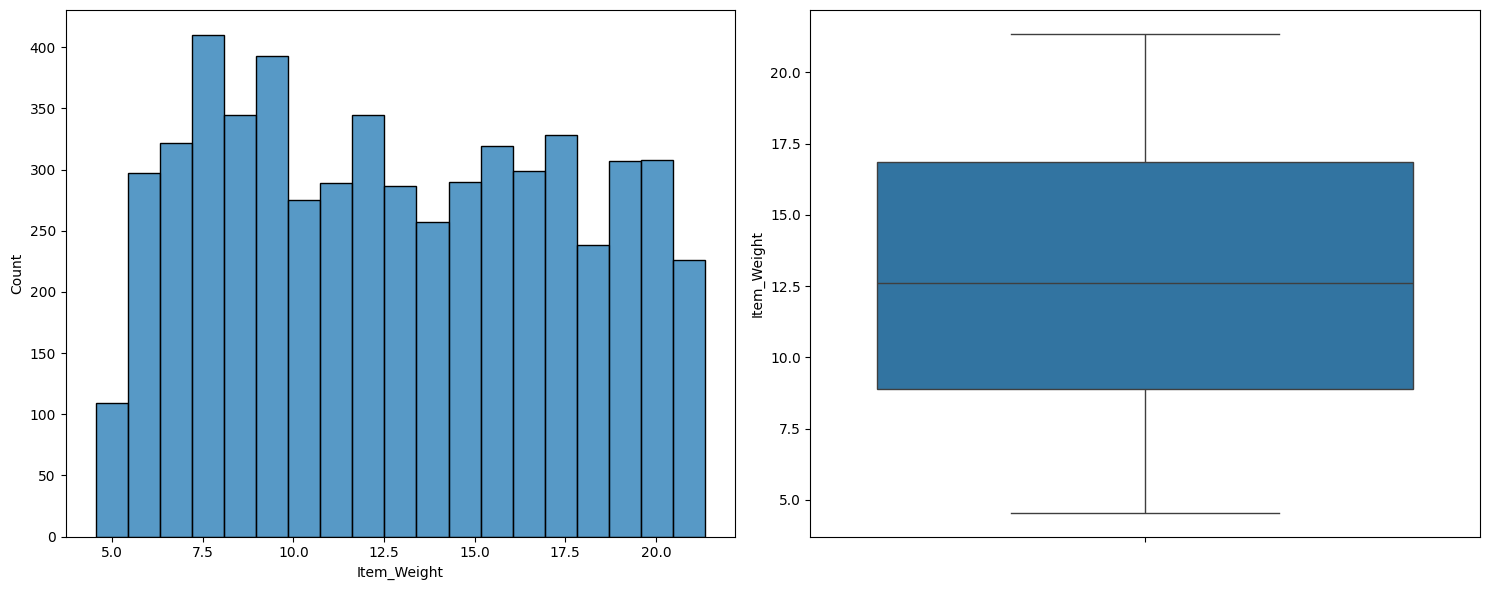

In [16]:
def plot_figs(data, column):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    sns.histplot(data=data, x=column, ax=ax1)
    sns.boxplot(data=data, y=column, ax=ax2)
    plt.tight_layout()
    plt.show()

plot_figs(X_train_v, 'Item_Weight')

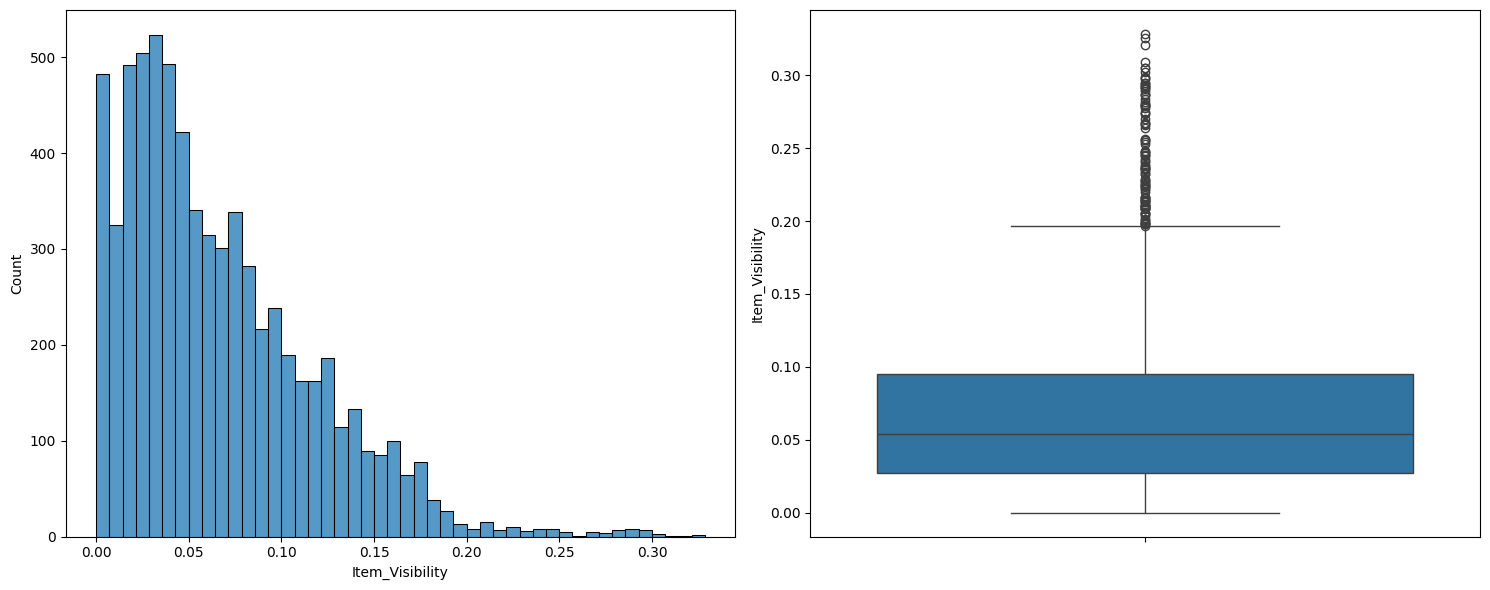

In [17]:

plot_figs(X_train_v, 'Item_Visibility')

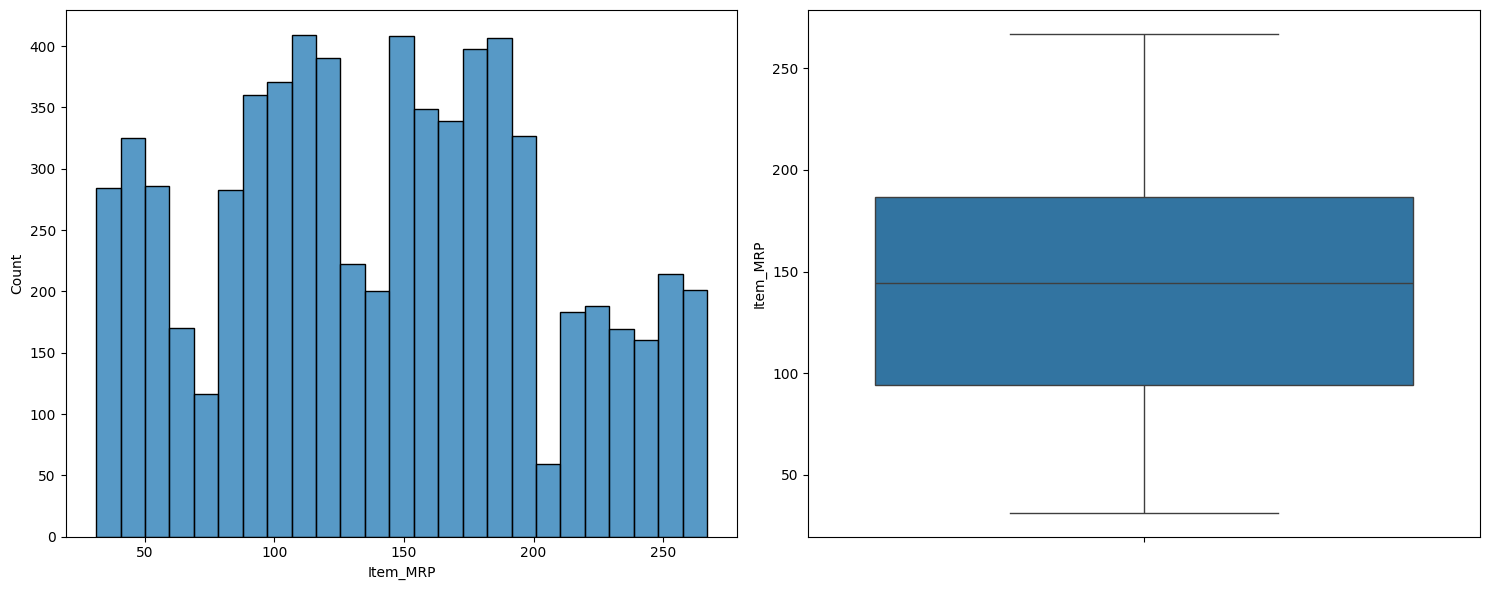

In [18]:
plot_figs(X_train_v, 'Item_MRP')


<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

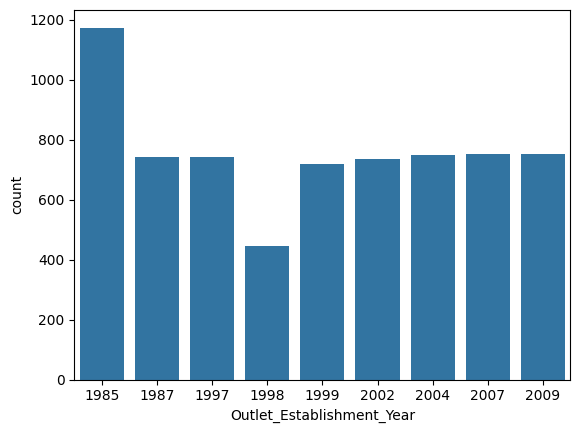

In [19]:
sns.countplot(data=X_train_v, x='Outlet_Establishment_Year')


In [20]:
categorical['Outlet_Size'].value_counts()


Outlet_Size
Medium    2233
Small     1906
High       744
Name: count, dtype: int64

In [21]:
categorical['Item_Fat_Content'].value_counts()


Item_Fat_Content
Low Fat    4035
Regular    2336
LF          267
reg          93
low fat      87
Name: count, dtype: int64

In [22]:
categorical['Item_Type'].value_counts()


Item_Type
Fruits and Vegetables    1002
Snack Foods               971
Household                 744
Frozen Foods              681
Dairy                     536
Canned                    513
Baking Goods              509
Health and Hygiene        409
Soft Drinks               354
Meat                      325
Breads                    190
Hard Drinks               183
Others                    139
Starchy Foods             128
Breakfast                  86
Seafood                    48
Name: count, dtype: int64

In [23]:
categorical['Outlet_Size'].value_counts()


Outlet_Size
Medium    2233
Small     1906
High       744
Name: count, dtype: int64

In [24]:
categorical['Outlet_Location_Type'].value_counts()


Outlet_Location_Type
Tier 3    2703
Tier 2    2239
Tier 1    1876
Name: count, dtype: int64

In [25]:
categorical['Outlet_Type'].value_counts()


Outlet_Type
Supermarket Type1    4446
Grocery Store         859
Supermarket Type3     761
Supermarket Type2     752
Name: count, dtype: int64

In [26]:
X_train_v['Item_Identifier'].apply(lambda x: x[:2]).value_counts()



Item_Identifier
FD    4887
NC    1292
DR     639
Name: count, dtype: int64

In [27]:
def create_new_features(data):
    data['Item_Type_new'] = data['Item_Identifier'].apply(lambda x: x[:2])
    data['Item_Type_new'] = data['Item_Type_new'].map({'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'})
    return data



In [28]:
X_train_v = create_new_features(X_train_v)
X_train_v.head()







,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_new
549,FDW44,9.500,Regular,0.035206,Fruits and Vegetables,171.3448,OUT049,1999,Medium,Tier 1,Supermarket Type1,Food
7757,NCF54,18.000,Low Fat,0.047473,Household,170.5422,OUT045,2002,NaN,Tier 2,Supermarket Type1,Non-Consumable
764,FDY03,17.600,Regular,0.076122,Meat,111.7202,OUT046,1997,Small,Tier 1,Supermarket Type1,Food
6867,FDQ20,8.325,Low Fat,0.029845,Fruits and Vegetables,41.6138,OUT045,2002,NaN,Tier 2,Supermarket Type1,Food
2716,FDP34,12.850,Low Fat,0.137228,Snack Foods,155.5630,OUT046,1997,Small,Tier 1,Supermarket Type1,Food


In [29]:
X_train_v.isnull().sum()



Item_Identifier                 0
Item_Weight                  1174
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1935
Outlet_Location_Type            0
Outlet_Type                     0
Item_Type_new                   0
dtype: int64

In [30]:
X_train_v[['Item_Identifier','Item_Weight' ]].drop_duplicates().sort_values(by='Item_Identifier')


,Item_Identifier,Item_Weight
1245,DRA12,11.60
4416,DRA24,NaN
4900,DRA24,19.35
8371,DRA59,8.27
6057,DRA59,NaN
...,...,...
6056,NCZ42,10.50
6879,NCZ53,9.60
2084,NCZ53,NaN
1896,NCZ54,NaN


In [31]:
item_pivoted = X_train_v.pivot_table(values=['Item_Weight'],index=['Item_Identifier']).reset_index()
item_weight_mapping = dict(zip(item_pivoted['Item_Identifier'], item_pivoted['Item_Weight']))
list(item_weight_mapping.items())[:10]


[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.3),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [32]:
item_type_pivoted = X_train_v.pivot_table(index=['Item_Type_new'], values=['Item_Weight'], aggfunc='median').reset_index()
item_type_mapping = dict(zip(item_type_pivoted['Item_Type_new'], item_type_pivoted['Item_Weight']))
item_type_mapping.items()


dict_items([('Drinks', 11.6), ('Food', 12.65), ('Non-Consumable', 13.1)])

In [33]:
def compute_item_weight(data_frame):
    # Fill missing Item_Weight by Item_Identifier mapping
    data_frame['Item_Weight'] = data_frame['Item_Weight'].fillna(
        data_frame['Item_Identifier'].map(item_weight_mapping)
    )
    
    # Fill remaining missing Item_Weight by Item_Type_new mapping
    data_frame['Item_Weight'] = data_frame['Item_Weight'].fillna(
        data_frame['Item_Type_new'].map(item_type_mapping)
    )
    
    return data_frame


In [34]:
X_train_v = compute_item_weight(X_train_v)

# Confirm missing values removed
X_train_v.isnull().sum()




Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1935
Outlet_Location_Type            0
Outlet_Type                     0
Item_Type_new                   0
dtype: int64

In [35]:
X_train_v.groupby(by=['Outlet_Type','Outlet_Size']).size()


Outlet_Type        Outlet_Size
Grocery Store      Small           413
Supermarket Type1  High            744
                   Medium          720
                   Small          1493
Supermarket Type2  Medium          752
Supermarket Type3  Medium          761
dtype: int64

In [36]:
outlet_size_pivoted = X_train_v.pivot_table(
    index='Outlet_Type',
    values='Outlet_Size',
    aggfunc=lambda x: x.mode().iloc[0] 
).reset_index()

outlet_size_mapping = dict(zip(outlet_size_pivoted['Outlet_Type'], outlet_size_pivoted['Outlet_Size']))
outlet_size_mapping



{'Grocery Store': 'Small',
 'Supermarket Type1': 'Small',
 'Supermarket Type2': 'Medium',
 'Supermarket Type3': 'Medium'}

In [37]:
def compute_outlet_size(data_frame):
    data_frame['Outlet_Size'] = data_frame.loc[:, 'Outlet_Size'].fillna(data_frame.loc[:, 'Outlet_Type'].map(outlet_size_mapping))
    return data_frame

X_train_v = compute_outlet_size(X_train_v)
X_train_v.isnull().sum()




Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Type_new                0
dtype: int64

In [38]:
#standardize the low fat
X_train_v['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    4035
Regular    2336
LF          267
reg          93
low fat      87
Name: count, dtype: int64

In [39]:
def standard_item_fat(data):
    data['Item_Fat_Content']= data['Item_Fat_Content'].replace({
        'Low Fat' : 'Low_Fat',
        'LF' : 'Low_Fat',
        'reg' : 'Regular',
        'low fat' : 'Low_Fat'
    })
    
    return data

In [40]:
X_train_v = standard_item_fat(X_train_v)
X_train_v['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low_Fat    4389
Regular    2429
Name: count, dtype: int64

In [41]:
X_train_v.groupby(by=['Item_Type_new','Item_Fat_Content']).size()


Item_Type_new   Item_Fat_Content
Drinks          Low_Fat              587
                Regular               52
Food            Low_Fat             2510
                Regular             2377
Non-Consumable  Low_Fat             1292
dtype: int64

In [42]:
def non_consumable_fat(data):
    data.loc[data['Item_Type_new'] == 'Non-Consumable','Item_Fat_Content'] = 'Non_Edible'
    return data


In [43]:
X_train_v = non_consumable_fat(X_train_v)
X_train_v.groupby(by=['Item_Type_new','Item_Fat_Content']).size()







Item_Type_new   Item_Fat_Content
Drinks          Low_Fat              587
                Regular               52
Food            Low_Fat             2510
                Regular             2377
Non-Consumable  Non_Edible          1292
dtype: int64

In [44]:
X_train_v.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6818 entries, 549 to 7270
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6818 non-null   object 
 1   Item_Weight                6818 non-null   float64
 2   Item_Fat_Content           6818 non-null   object 
 3   Item_Visibility            6818 non-null   float64
 4   Item_Type                  6818 non-null   object 
 5   Item_MRP                   6818 non-null   float64
 6   Outlet_Identifier          6818 non-null   object 
 7   Outlet_Establishment_Year  6818 non-null   int64  
 8   Outlet_Size                6818 non-null   object 
 9   Outlet_Location_Type       6818 non-null   object 
 10  Outlet_Type                6818 non-null   object 
 11  Item_Type_new              6818 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 692.5+ KB


## prepare on the original dataset

In [45]:
def data_prep(data):
    #create new features
    data = create_new_features(data)
    #compute item weight
    data = compute_item_weight(data)
    #compute outlet size
    data = compute_outlet_size(data)
    #standardize item fat content
    data = standard_item_fat(data)
    #non-consumable fat content
    data = non_consumable_fat(data)
    
    return data


In [46]:
Xtrain.isnull().sum()


Item_Identifier                 0
Item_Weight                  1174
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1935
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [47]:
Xtrain = data_prep(Xtrain)
Xtrain.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Type_new                0
dtype: int64

In [48]:
Xtest.isnull().sum()


Item_Identifier                0
Item_Weight                  289
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  475
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [49]:
Xtest = data_prep(Xtest)
Xtest.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Type_new                0
dtype: int64

# handling categorical data

In [50]:
categorical_cols = Xtrain.select_dtypes(include=['object'])

categorical_cols.head()


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_new
549,FDW44,Regular,Fruits and Vegetables,OUT049,Medium,Tier 1,Supermarket Type1,Food
7757,NCF54,Non_Edible,Household,OUT045,Small,Tier 2,Supermarket Type1,Non-Consumable
764,FDY03,Regular,Meat,OUT046,Small,Tier 1,Supermarket Type1,Food
6867,FDQ20,Low_Fat,Fruits and Vegetables,OUT045,Small,Tier 2,Supermarket Type1,Food
2716,FDP34,Low_Fat,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1,Food


In [51]:
#one hot encoding

ohe = OneHotEncoder(handle_unknown='ignore')

ohe.fit(categorical_cols)





OneHotEncoder(handle_unknown='ignore')

In [52]:
ohe_cols = ohe.get_feature_names_out(input_features=categorical_cols.columns)
ohe_cols


array(['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', ..., 'Item_Type_new_Drinks',
       'Item_Type_new_Food', 'Item_Type_new_Non-Consumable'], dtype=object)

In [53]:
num_cols = Xtrain.select_dtypes(exclude=['object']).reset_index(drop=True)
num_cols.head()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.500,0.035206,171.3448,1999
1,18.000,0.047473,170.5422,2002
2,17.600,0.076122,111.7202,1997
3,8.325,0.029845,41.6138,2002
4,12.850,0.137228,155.5630,1997


In [54]:
categorical_cols_feats= Xtrain.select_dtypes(include=['object'])
Xtrain_feats= pd.DataFrame(ohe.transform(categorical_cols_feats).toarray(), columns=ohe_cols)
Xtrain_feats.head()


,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_new_Drinks,Item_Type_new_Food,Item_Type_new_Non-Consumable
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [55]:
Xtrain_final = pd.concat([num_cols, Xtrain_feats], axis=1)
Xtrain_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_new_Drinks,Item_Type_new_Food,Item_Type_new_Non-Consumable
0,9.500,0.035206,171.3448,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,18.000,0.047473,170.5422,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,17.600,0.076122,111.7202,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,8.325,0.029845,41.6138,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,12.850,0.137228,155.5630,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [56]:
final_cols = Xtrain_final.columns.values
final_cols


array(['Item_Weight', 'Item_Visibility', 'Item_MRP', ...,
       'Item_Type_new_Drinks', 'Item_Type_new_Food',
       'Item_Type_new_Non-Consumable'], dtype=object)

In [57]:
num_cols_test = Xtest.select_dtypes(exclude=['object']).reset_index(drop=True)
categorical_cols_test = Xtest.select_dtypes(include=['object'])
Xtest_feats= pd.DataFrame(ohe.transform(categorical_cols_test).toarray(), columns=ohe_cols)
Xtest_final = pd.concat([num_cols_test, Xtest_feats], axis=1)
Xtest_final =Xtest_final[final_cols]
Xtest_final.head()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_new_Drinks,Item_Type_new_Food,Item_Type_new_Non-Consumable
0,14.300,0.026300,79.4302,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,13.000,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Modeling


<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

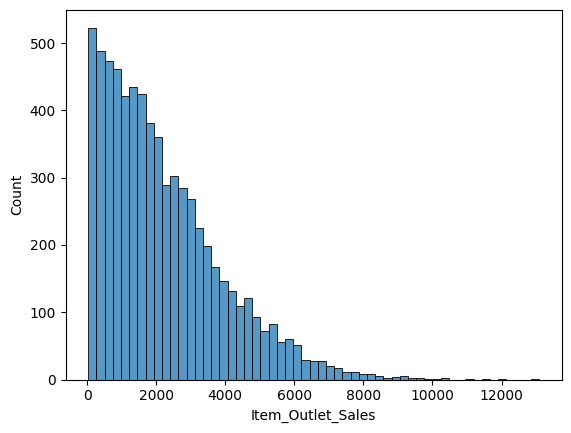

In [58]:
sns.histplot(ytrain)


In [59]:
#cross validation 5 folds
def cross_validation(model, X_train, y_train, cv = 5):
    cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=('r2','neg_mean_absolute_error'))
    print('Model: ', model)
    r2_score = cv_results['test_r2']
    print('R2 Score: ', r2_score.mean())
    print('R2 score mean / std: ', r2_score.mean(),'/', r2_score.std())

    rmse_score = cv_results['test_neg_mean_absolute_error']
    rmse_score = np.array([-1*score for score in rmse_score])
    print('RMSE Score: ', rmse_score)
    print('RMSE score mean / std: ', rmse_score.mean(),'/', rmse_score.std())
    return cv_results



In [60]:
rf= RandomForestRegressor(random_state= 42)
cross_validation(rf, Xtrain_final, ytrain)







Model:  RandomForestRegressor(random_state=42)
R2 Score:  0.5471831292293545
R2 score mean / std:  0.5471831292293545 / 0.007310903452762071
RMSE Score:  [799.50781087 806.7579482  805.13914629 805.45081239 817.53850665]
RMSE score mean / std:  806.8788448802111 / 5.882873028760954


{'fit_time': array([25.23066211, 25.52176309, 24.96657348, 25.2400825 , 25.98683047]),
 'score_time': array([0.08147812, 0.07956719, 0.08054543, 0.08404207, 0.07468271]),
 'test_r2': array([0.54576128, 0.5535286 , 0.5515244 , 0.55158379, 0.53351757]),
 'test_neg_mean_absolute_error': array([-799.50781087, -806.7579482 , -805.13914629, -805.45081239,
        -817.53850665])}

In [61]:
gb = GradientBoostingRegressor(random_state=42)
cross_validation(gb, Xtrain_final, ytrain)







Model:  GradientBoostingRegressor(random_state=42)
R2 Score:  0.58422326015199
R2 score mean / std:  0.58422326015199 / 0.014113450542007485
RMSE Score:  [764.33508895 772.26095936 782.73610838 769.7568167  797.16639384]
RMSE score mean / std:  777.2510734449864 / 11.615449820802274


{'fit_time': array([13.49029732, 14.88777542, 13.57418251, 15.43778634, 16.03539109]),
 'score_time': array([0.04810357, 0.04024911, 0.01580429, 0.04738235, 0.03874159]),
 'test_r2': array([0.58753325, 0.59343044, 0.58514867, 0.5976143 , 0.55738964]),
 'test_neg_mean_absolute_error': array([-764.33508895, -772.26095936, -782.73610838, -769.7568167 ,
        -797.16639384])}

In [62]:
hgb = HistGradientBoostingRegressor(random_state=42)
cross_validation(hgb, Xtrain_final, ytrain)



Model:  HistGradientBoostingRegressor(random_state=42)
R2 Score:  0.567974719898088
R2 score mean / std:  0.567974719898088 / 0.009029085508336768
RMSE Score:  [781.56201143 785.56400944 793.34892495 779.80462655 800.62978203]
RMSE score mean / std:  788.1818708807488 / 7.778211876395389


{'fit_time': array([8.32874036, 8.16600227, 8.15989304, 8.08337402, 8.27803969]),
 'score_time': array([0.03487992, 0.02984452, 0.03319907, 0.02577591, 0.03213787]),
 'test_r2': array([0.56129628, 0.57289658, 0.56430144, 0.58315081, 0.55822849]),
 'test_neg_mean_absolute_error': array([-781.56201143, -785.56400944, -793.34892495, -779.80462655,
        -800.62978203])}

In [63]:
Xgb = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
cross_validation(Xgb, Xtrain_final, ytrain)


Model:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)
R2 Score:  0.560375920878659
R2 score mean / std:  0.560375920878659 / 0.01647714211364047
RMSE Score:  [781.81106979 799.73326744 800.9182169  783.75761012 821.05504329]
RMSE score mean / std:  797.4550415063854 / 14.188005210833596


{'fit_time': array([2.05671191, 1.30445123, 1.47079921, 1.39467216, 1.29874086]),
 'score_time': array([0.23847294, 0.10769057, 0.11255431, 0.16307855, 0.18934989]),
 'test_r2': array([0.56811441, 0.55978419, 0.55815089, 0.58321511, 0.53261502]),
 'test_neg_mean_absolute_error': array([-781.81106979, -799.73326744, -800.9182169 , -783.75761012,
        -821.05504329])}

In [64]:
lgbr = LGBMRegressor(random_state=42)
cross_validation(lgbr, Xtrain_final, ytrain)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000644 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 5454, number of used features: 46
[LightGBM] [Info] Start training from score 2210.060721
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 5454, number of used features: 46
[LightGBM] [Info] Start training from score 2214.849499
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM]

{'fit_time': array([0.24379253, 0.21735072, 0.22757387, 0.23735213, 0.23291039]),
 'score_time': array([0.02492809, 0.01560736, 0.02686501, 0.01962543, 0.02500486]),
 'test_r2': array([0.55942165, 0.57725566, 0.56483096, 0.58978075, 0.55829641]),
 'test_neg_mean_absolute_error': array([-781.97756843, -780.35099794, -791.23047914, -776.85371239,
        -797.33614601])}

# handling categorical data 

In [65]:
X_train_c = Xtrain.copy().drop(columns=['Item_Identifier'])

categorical_cols = X_train_c.select_dtypes(include=['object']).columns.tolist()
num_cols = X_train_c.select_dtypes(exclude=['object']).columns.tolist()

categorical_cols, num_cols


(['Item_Fat_Content',
  'Item_Type',
  'Outlet_Identifier',
  'Outlet_Size',
  'Outlet_Location_Type',
  'Outlet_Type',
  'Item_Type_new'],
 ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'])

In [66]:
X_train_c[categorical_cols] = X_train_c[categorical_cols].astype('category')
n_cat_cols = len(categorical_cols)
n_num_cols = len(num_cols)
X_train_c  = X_train_c[categorical_cols + num_cols]
X_train_c.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6818 entries, 549 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Fat_Content           6818 non-null   category
 1   Item_Type                  6818 non-null   category
 2   Outlet_Identifier          6818 non-null   category
 3   Outlet_Size                6818 non-null   category
 4   Outlet_Location_Type       6818 non-null   category
 5   Outlet_Type                6818 non-null   category
 6   Item_Type_new              6818 non-null   category
 7   Item_Weight                6818 non-null   float64 
 8   Item_Visibility            6818 non-null   float64 
 9   Item_MRP                   6818 non-null   float64 
 10  Outlet_Establishment_Year  6818 non-null   int64   
dtypes: category(7), float64(3), int64(1)
memory usage: 314.7 KB


In [67]:
cat_mask = [True] * n_cat_cols + [False] * n_num_cols
cat_mask

[True, True, True, True, True, True, True, False, False, False, False]

In [68]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

cat_mask = [True] * n_cat_cols + [False] * n_num_cols

ordinal_encoder = make_column_transformer(
    (
        OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan),
        make_column_selector(dtype_include="category")
    ),
    remainder='passthrough'
)



hgb = make_pipeline(
    ordinal_encoder,
    HistGradientBoostingRegressor(random_state=42, categorical_features=cat_mask),
)

cross_validation(hgb, X_train_c, ytrain)





Model:  Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001EDF96B7920>)])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features=[True, True,
                                                                     True, True,
                                                                     True, True,
                                                                     True,
                                                                     False,
                                                     

{'fit_time': array([0.40343118, 0.33763433, 0.34227657, 0.34496641, 0.34338784]),
 'score_time': array([0.01914692, 0.02085519, 0.01897311, 0.01740718, 0.01989388]),
 'test_r2': array([0.56371445, 0.57066305, 0.56345209, 0.58774177, 0.55984007]),
 'test_neg_mean_absolute_error': array([-773.87882223, -787.88810406, -793.70806158, -776.57231349,
        -793.32477083])}

In [69]:
lbr = LGBMRegressor(random_state=42)
cross_validation(lbr, X_train_c, ytrain)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 800
[LightGBM] [Info] Number of data points in the train set: 5454, number of used features: 11
[LightGBM] [Info] Start training from score 2210.060721
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 801
[LightGBM] [Info] Number of data points in the train set: 5454, number of used features: 11
[LightGBM] [Info] Start training from score 2214.849499
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

{'fit_time': array([0.09167147, 0.07912517, 0.07788682, 0.08242726, 0.07816148]),
 'score_time': array([0.00987911, 0.00680304, 0.00782084, 0.00790429, 0.00695062]),
 'test_r2': array([0.55458039, 0.57919489, 0.56272176, 0.59351214, 0.55289329]),
 'test_neg_mean_absolute_error': array([-783.63175638, -781.18926292, -794.26880362, -774.2504424 ,
        -795.8523525 ])}

# handle categorical data 
3 exp no item identifier -one hot encoding

In [70]:
Xtrain.select_dtypes(include=['object']).drop(columns=['Item_Identifier','Item_Type_new']).head()


,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
549,Regular,Fruits and Vegetables,OUT049,Medium,Tier 1,Supermarket Type1
7757,Non_Edible,Household,OUT045,Small,Tier 2,Supermarket Type1
764,Regular,Meat,OUT046,Small,Tier 1,Supermarket Type1
6867,Low_Fat,Fruits and Vegetables,OUT045,Small,Tier 2,Supermarket Type1
2716,Low_Fat,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1


In [71]:
categorical_cols = Xtrain.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(categorical_cols)
ohe_cols = ohe.get_feature_names_out(input_features=categorical_cols.columns)


In [72]:
num_cols_train = Xtrain.select_dtypes(exclude=['object']).reset_index(drop=True)
categorical_cols_train= Xtrain.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
Xtrain_feats= pd.DataFrame(ohe.transform(categorical_cols_train).toarray(), columns=ohe_cols)
Xtrain_final = pd.concat([num_cols_train, Xtrain_feats], axis=1)
Xtrain_final.head()




,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low_Fat,Item_Fat_Content_Non_Edible,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_new_Drinks,Item_Type_new_Food,Item_Type_new_Non-Consumable
0,9.500,0.035206,171.3448,1999,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,18.000,0.047473,170.5422,2002,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,17.600,0.076122,111.7202,1997,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,8.325,0.029845,41.6138,2002,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,12.850,0.137228,155.5630,1997,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [73]:
Xtrain_final.shape

(6818, 46)

In [74]:
gb = GradientBoostingRegressor(random_state=42)
cross_validation(gb, Xtrain_final, ytrain)



Model:  GradientBoostingRegressor(random_state=42)
R2 Score:  0.5890222700945781
R2 score mean / std:  0.5890222700945781 / 0.012973762625441388
RMSE Score:  [761.51953556 769.86403718 777.61014485 756.10750779 787.08413043]
RMSE score mean / std:  770.4370711619173 / 11.079393158162244


{'fit_time': array([1.37529278, 1.39548159, 1.36427021, 1.34874272, 1.32855344]),
 'score_time': array([0.        , 0.01578236, 0.00691891, 0.00557947, 0.00686502]),
 'test_r2': array([0.58562118, 0.59680955, 0.58081297, 0.60957092, 0.57229673]),
 'test_neg_mean_absolute_error': array([-761.51953556, -769.86403718, -777.61014485, -756.10750779,
        -787.08413043])}

In [75]:
hgb = HistGradientBoostingRegressor(random_state=42)
cross_validation(hgb, Xtrain_final, ytrain)



Model:  HistGradientBoostingRegressor(random_state=42)
R2 Score:  0.567974719898088
R2 score mean / std:  0.567974719898088 / 0.009029085508336768
RMSE Score:  [781.56201143 785.56400944 793.34892495 779.80462655 800.62978203]
RMSE score mean / std:  788.1818708807488 / 7.778211876395389


{'fit_time': array([0.41647816, 0.38837218, 0.384691  , 0.36718345, 0.38840604]),
 'score_time': array([0.01334667, 0.0081985 , 0.0087173 , 0.00891256, 0.00863194]),
 'test_r2': array([0.56129628, 0.57289658, 0.56430144, 0.58315081, 0.55822849]),
 'test_neg_mean_absolute_error': array([-781.56201143, -785.56400944, -793.34892495, -779.80462655,
        -800.62978203])}

In [76]:
Xgb = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
cross_validation(Xgb, Xtrain_final, ytrain)




Model:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)
R2 Score:  0.5066960833954637
R2 score mean / std:  0.5066960833954637 / 0.01726052475466893
RMSE Score:  [831.7459184  848.96828082 860.24615711 849.11847902 874.44170478]
RMSE score mean / std:  852.9041080260624 / 14.108610631715225


{'fit_time': array([0.1770997 , 0.16694856, 0.14569902, 0.15186644, 0.13674593]),
 'score_time': array([0.00869036, 0.00825667, 0.00802088, 0.00793982, 0.00712037]),
 'test_r2': array([0.52060675, 0.50623642, 0.50083205, 0.52772942, 0.47807577]),
 'test_neg_mean_absolute_error': array([-831.7459184 , -848.96828082, -860.24615711, -849.11847902,
        -874.44170478])}

In [77]:
lbr = LGBMRegressor(random_state=42)
cross_validation(lbr, Xtrain_final, ytrain)




[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 5454, number of used features: 46
[LightGBM] [Info] Start training from score 2210.060721
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 5454, number of used features: 46
[LightGBM] [Info] Start training from score 2214.849499
[LightGBM] [Warning] Found

{'fit_time': array([0.09860158, 0.08341265, 0.09227395, 0.08861303, 0.08929706]),
 'score_time': array([0.00545478, 0.00489473, 0.00638533, 0.00599766, 0.00448084]),
 'test_r2': array([0.55942165, 0.57725566, 0.56483096, 0.58978075, 0.55829641]),
 'test_neg_mean_absolute_error': array([-781.97756843, -780.35099794, -791.23047914, -776.85371239,
        -797.33614601])}

# hanling categorical features 
EXp 4 item identifier -  feature hashed, rest categorical - one hot endocding


In [78]:
from sklearn.feature_extraction import FeatureHasher

hash_vector_size =  50
fh = FeatureHasher(n_features=hash_vector_size, input_type='string')
# Convert the Series to a 2D array where each row is a list containing a single string
X_hashed = fh.fit_transform(Xtrain['Item_Identifier'].values.reshape(-1, 1)).toarray()
hashed_df = pd.DataFrame(X_hashed, columns=['H'+str(i) for i in range(hash_vector_size)])

hashed_df.head()


,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,...,H40,H41,H42,H43,H44,H45,H46,H47,H48,H49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
categorical_cols = Xtrain.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(categorical_cols)
ohe_cols = ohe.get_feature_names_out(input_features=categorical_cols.columns)


In [80]:
num_cols_train = Xtrain.select_dtypes(exclude=['object']).reset_index(drop=True)
categorical_cols_train= Xtrain.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
Xtrain_feats= pd.DataFrame(ohe.transform(categorical_cols_train).toarray(), columns=ohe_cols)
Xtrain_final = pd.concat([num_cols_train,hashed_df, Xtrain_feats], axis=1)
Xtrain_final.head()




,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,H0,H1,H2,H3,H4,H5,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_new_Drinks,Item_Type_new_Food,Item_Type_new_Non-Consumable
0,9.500,0.035206,171.3448,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,18.000,0.047473,170.5422,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,17.600,0.076122,111.7202,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,8.325,0.029845,41.6138,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,12.850,0.137228,155.5630,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [81]:
Xtrain_final.shape


(6818, 96)

In [82]:
gb = GradientBoostingRegressor(random_state=42)
cross_validation(gb, Xtrain_final, ytrain)


Model:  GradientBoostingRegressor(random_state=42)
R2 Score:  0.58526287250465
R2 score mean / std:  0.58526287250465 / 0.0157311339709897
RMSE Score:  [759.89282816 774.54643301 779.59551765 763.75894875 798.39222218]
RMSE score mean / std:  775.2371899525032 / 13.585485952902559


{'fit_time': array([1.81287169, 1.75681639, 1.72415614, 1.78168726, 1.82054687]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_r2': array([0.58778167, 0.59216585, 0.58460619, 0.60480211, 0.55695855]),
 'test_neg_mean_absolute_error': array([-759.89282816, -774.54643301, -779.59551765, -763.75894875,
        -798.39222218])}

In [83]:
Xgb = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
cross_validation(Xgb, Xtrain_final, ytrain)




Model:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)
R2 Score:  0.5131658875452715
R2 score mean / std:  0.5131658875452715 / 0.02396220164746577
RMSE Score:  [828.08907221 840.25657794 871.18604241 828.94121308 876.87219327]
RMSE score mean / std:  849.0690197828277 / 20.905143291068732


{'fit_time': array([0.20370364, 0.17629313, 0.17150474, 0.16526198, 0.17436457]),
 'score_time': array([0.01094723, 0.01102662, 0.00909495, 0.01073837, 0.01034832]),
 'test_r2': array([0.53329958, 0.51838225, 0.50000058, 0.54017035, 0.47397669]),
 'test_neg_mean_absolute_error': array([-828.08907221, -840.25657794, -871.18604241, -828.94121308,
        -876.87219327])}

In [84]:
Xtest.shape


(1705, 12)

In [94]:
X_hashed_test_df = pd.DataFrame(fh.transform([[x] for x in Xtest['Item_Identifier']]).toarray(),
                                columns=['H'+str(i) for i in range(hash_vector_size)])
num_cols_test = Xtest.select_dtypes(exclude=['object']).reset_index(drop=True)
categorical_cols_train= Xtest.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
Xtest_feats= pd.DataFrame(ohe.transform(categorical_cols_train).toarray(), columns=ohe_cols)
Xtest_final = pd.concat([num_cols_test,X_hashed_test_df, Xtest_feats], axis=1)
Xtest_final.head()



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,H0,H1,H2,H3,H4,H5,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_new_Drinks,Item_Type_new_Food,Item_Type_new_Non-Consumable
0,14.300,0.026300,79.4302,1987,-1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,13.000,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [95]:
Xtest_final.shape

(1705, 96)

In [122]:
gb = GradientBoostingRegressor(random_state=42)
gb.fit(Xtrain_final, ytrain)

GradientBoostingRegressor(random_state=42)

In [123]:
ypred = gb.predict(Xtest_final)

In [124]:
print('R2 score: ' ,r2_score(ytest,ypred))
rmse = np.sqrt(mean_squared_error(ytest, ypred))
print("RMSE Score:", rmse)

R2 score:  0.6050645289372765
RMSE Score: 1036.061189599175


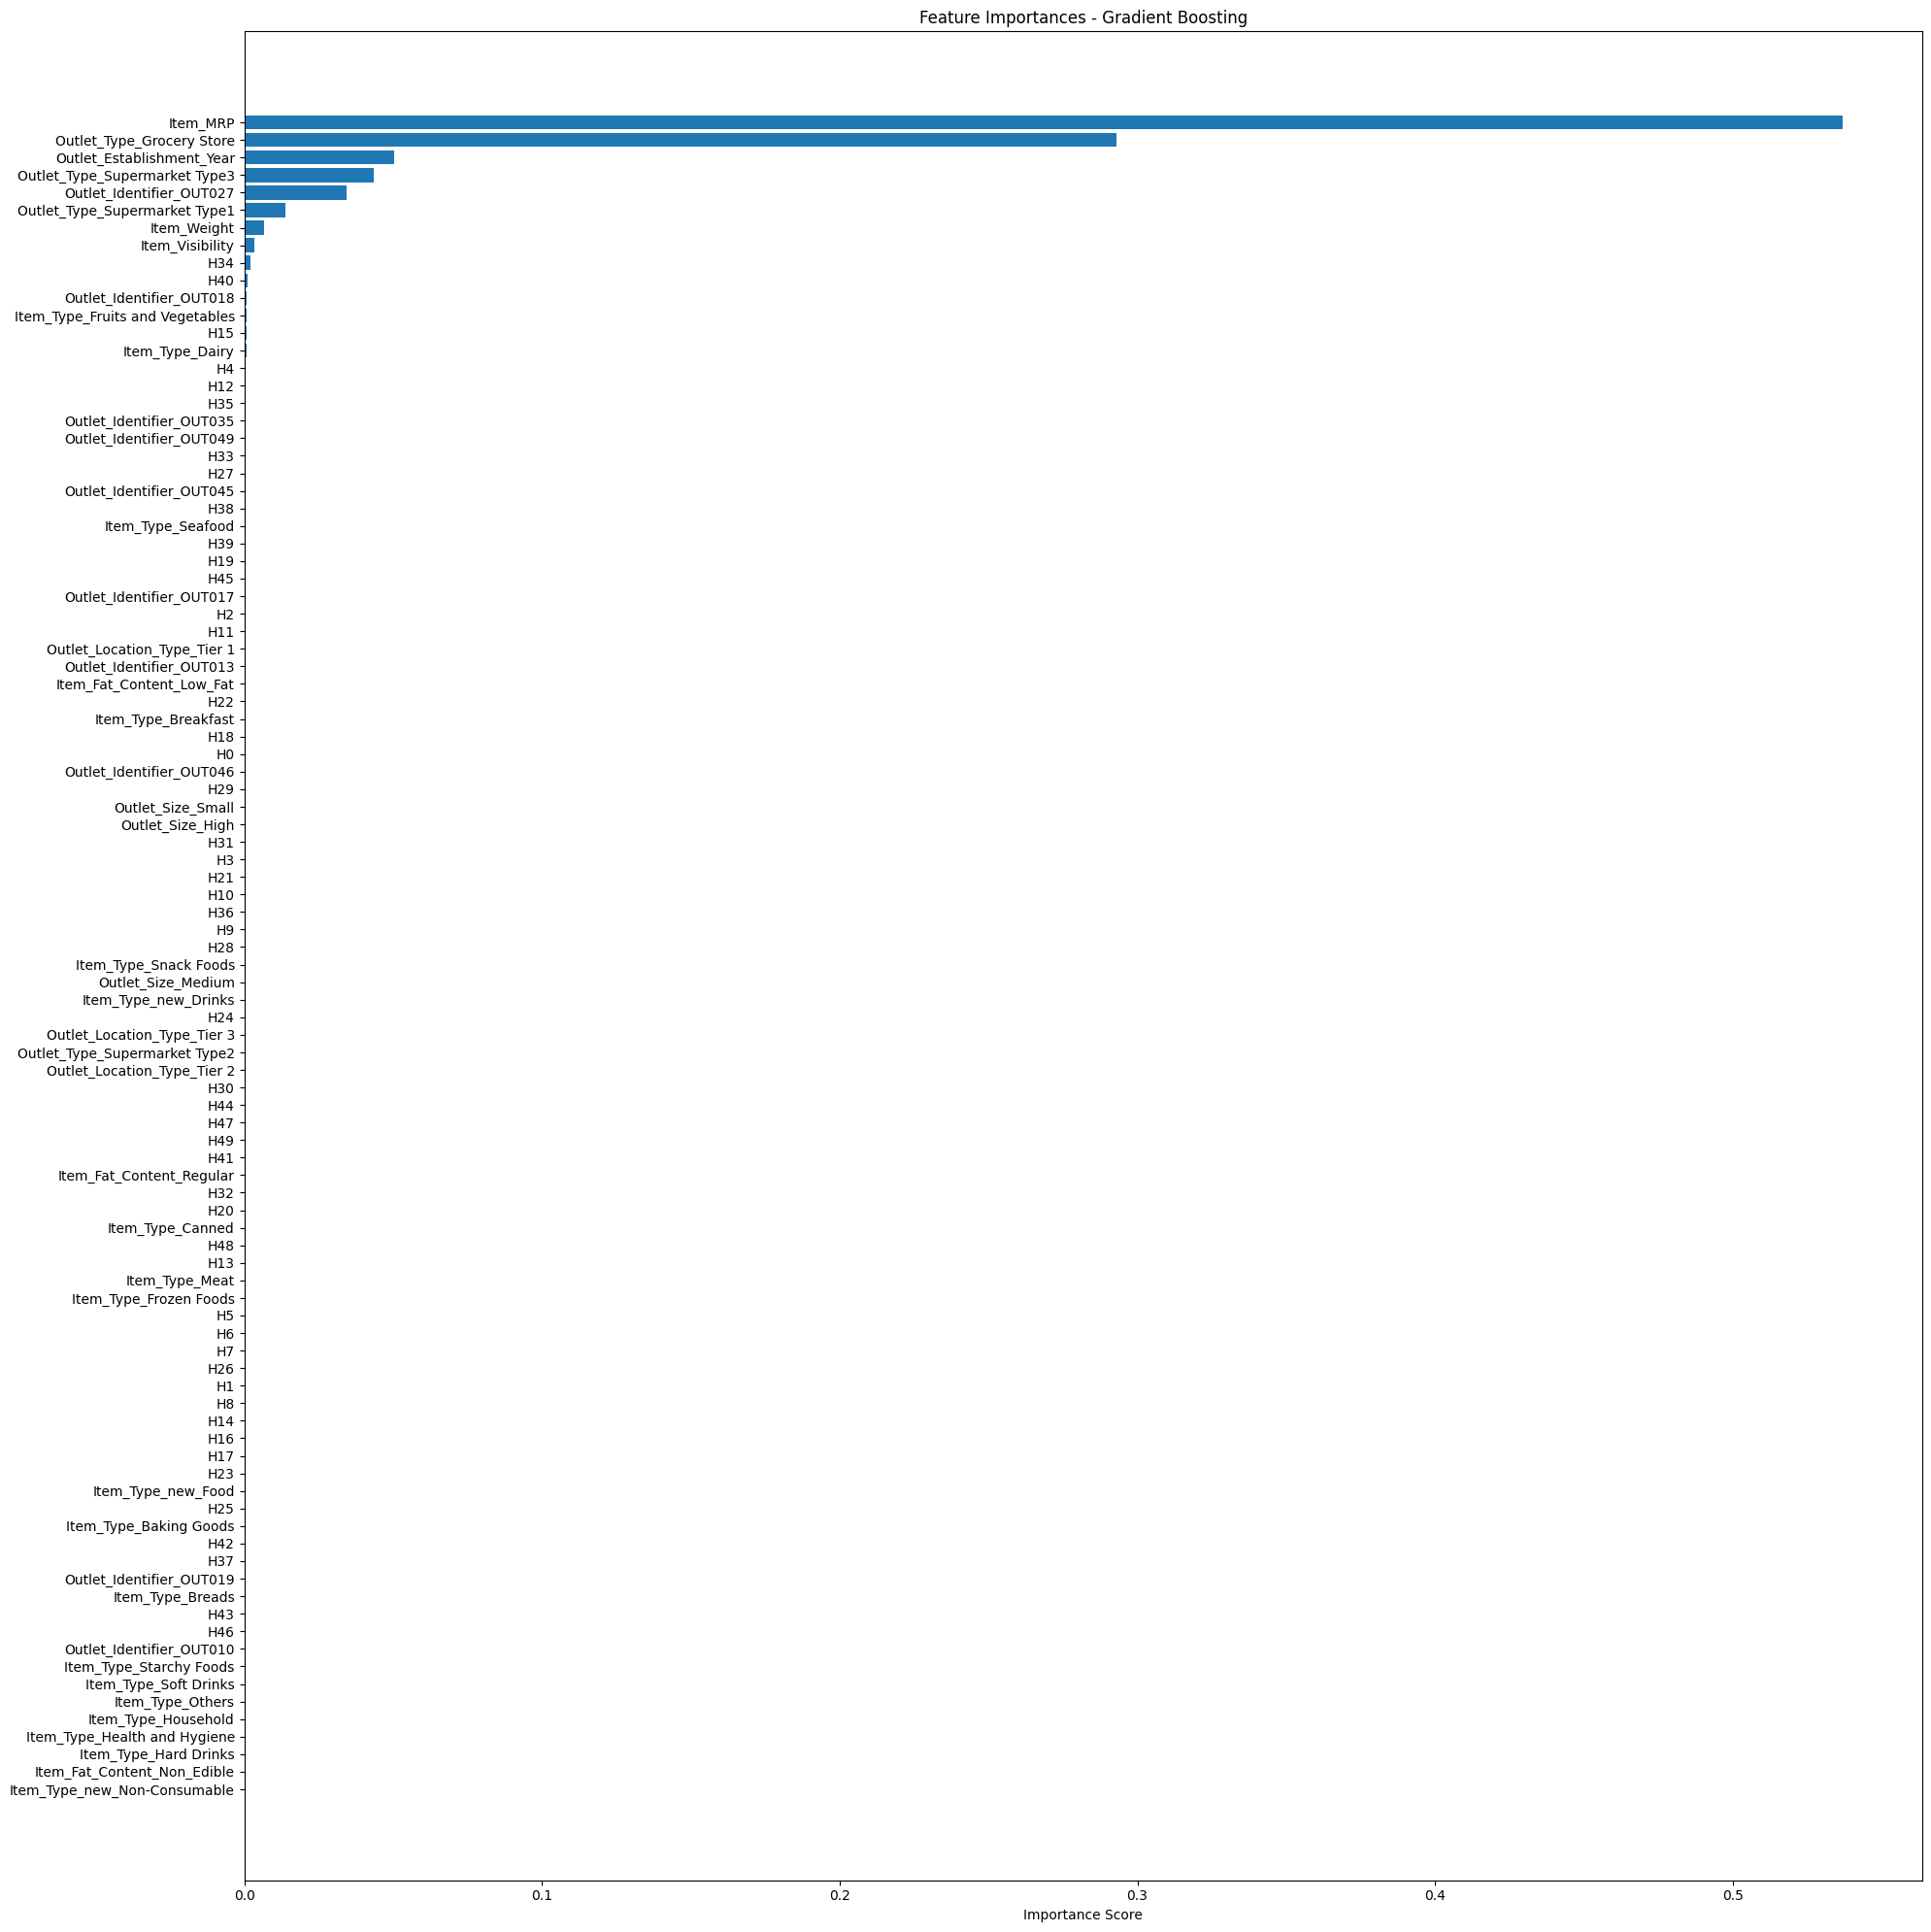

In [125]:
# Get feature importances and feature names
importances = gb.feature_importances_
feature_names = Xtest_final.columns

# Create a DataFrame for easier plotting/sorting
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(20,20))
plt.barh(feat_importance_df['Feature'], feat_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importances - Gradient Boosting')
plt.gca().invert_yaxis()  # Most important on top
plt.tight_layout()
plt.show()